In [44]:
# default_exp data
%load_ext lab_black
# nb_black if running in jupyter
%load_ext autoreload
# automatically reload (local) python modules if they are updated
%autoreload 2

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
# hide
from nbdev.showdoc import *

# Data

> You should begin your work by cleaning up your data and possibly defining tools for doing it repeateadly.



***input***: raw data

***output***: clean and tidy dataset + toy dataset for testing

***description:***

This is the first notebook of your machine learning project. In this notebook, you will load the data, inspect, clean and make it tidy. 
You will define the data points and their features and labels. The output of this notebook is a clean, tidy dataset ready for analysis and machine learning.
You can also do a basic statistical analysis of the data to better understand it.
For any functions you define for handling the data, remember to mark their cells with `# export` -comment,
so that they will be included in the data.py-module built based on this notebook.
You can also include unit tests for your own functions.

Rewrite this and the other text cells with your own descriptions.

## Import relevant modules

In [46]:
# export
import numpy as np
import pandas as pd

# your code here

In [47]:
np.array([])

array([], dtype=float64)

## Define notebook parameters

Define input, output and additional parameters of this notebook, the information needed for running the notebook.
In your own project, you can do this step in the later iterations of the work,
when you know what is required.
In this cell, only assing values to variables directly: `variable_name = value`.
**Do not derive any information in this cell as it will mess up the parameterization** - do it in the cell below.

In [48]:
# This cell is tagged with 'parameters'
seed = 0
data_adress = (
    "https://api.worldbank.org/v2/en/indicator/TX.VAL.TECH.MF.ZS?downloadformat=csv"
)
zip_name = "data.zip"
# your code here

Define any immediate derivative operations from the parameters:

In [49]:
# set seed
np.random.seed(seed)
# your code here

## Load the data

Load zip

In [50]:
import requests
from pathlib import Path

# where data is loaded from
data_adress = (
    "https://api.worldbank.org/v2/en/indicator/TX.VAL.TECH.MF.ZS?downloadformat=csv"
)
# name of zip file to be saved
zip_name = "data.zip"

# filepath to raw data folder
raw_data_path = Path().cwd() / "data" / "raw_data"
# open file to write in binary mode, and call it f
with open(raw_data_path / zip_name, "wb") as f:
    # load file content with requests
    loaded_file = requests.get(data_adress).content
    # write contents to file
    f.write(loaded_file)

In [51]:
from zipfile import ZipFile

# extract zip
with ZipFile(raw_data_path / zip_name) as myzip:
    myzip.extractall(raw_data_path)  # , members=None, pwd=None)

In [52]:
# read csv
csvfile1 = "API_TX.VAL.TECH.MF.ZS_DS2_en_csv_v2_3733541.csv"
df = pd.read_csv(raw_data_path / csvfile1, skiprows=3)
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,High-technology exports (% of manufactured exp...,TX.VAL.TECH.MF.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,11.259181,5.140044,7.322688,4.968986,4.042395,6.540015,8.314288,4.353669,6.756353,NaN
1,Africa Eastern and Southern,AFE,High-technology exports (% of manufactured exp...,TX.VAL.TECH.MF.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.235444,NaN,6.764526,6.915408,7.021332,4.279257,7.479589,4.521764,NaN
2,Afghanistan,AFG,High-technology exports (% of manufactured exp...,TX.VAL.TECH.MF.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
3,Africa Western and Central,AFW,High-technology exports (% of manufactured exp...,TX.VAL.TECH.MF.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.039060,4.141179,4.299683,8.553370,3.343442,3.618065,4.075787,3.609411,NaN,NaN
4,Angola,AGO,High-technology exports (% of manufactured exp...,TX.VAL.TECH.MF.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,12.604486,12.984726,19.382345,3.971136,26.385133,NaN,NaN


In [53]:
# drop last (empty) col
df.drop(df.columns[-1], axis=1)
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,High-technology exports (% of manufactured exp...,TX.VAL.TECH.MF.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,11.259181,5.140044,7.322688,4.968986,4.042395,6.540015,8.314288,4.353669,6.756353,NaN
1,Africa Eastern and Southern,AFE,High-technology exports (% of manufactured exp...,TX.VAL.TECH.MF.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.235444,NaN,6.764526,6.915408,7.021332,4.279257,7.479589,4.521764,NaN
2,Afghanistan,AFG,High-technology exports (% of manufactured exp...,TX.VAL.TECH.MF.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
3,Africa Western and Central,AFW,High-technology exports (% of manufactured exp...,TX.VAL.TECH.MF.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.039060,4.141179,4.299683,8.553370,3.343442,3.618065,4.075787,3.609411,NaN,NaN
4,Angola,AGO,High-technology exports (% of manufactured exp...,TX.VAL.TECH.MF.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,12.604486,12.984726,19.382345,3.971136,26.385133,NaN,NaN


## Describe the data

Define data points, features and labels

In [54]:
df.nunique()

Country Name      266
Country Code      266
Indicator Name      1
Indicator Code      1
1960                0
                 ... 
2017              203
2018              197
2019              184
2020              162
Unnamed: 65         0
Length: 66, dtype: int64

In [55]:
df.drop(["Country Name", "Indicator Name", "Indicator Code"], axis=1, inplace=True)
df.head()

,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.259181,5.140044,7.322688,4.968986,4.042395,6.540015,8.314288,4.353669,6.756353,NaN
1,AFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.235444,NaN,6.764526,6.915408,7.021332,4.279257,7.479589,4.521764,NaN
2,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
3,AFW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.039060,4.141179,4.299683,8.553370,3.343442,3.618065,4.075787,3.609411,NaN,NaN
4,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,12.604486,12.984726,19.382345,3.971136,26.385133,NaN,NaN


In [56]:
df.isna().sum()

Country Code      0
1960            266
1961            266
1962            266
1963            266
               ... 
2017             60
2018             65
2019             76
2020            100
Unnamed: 65     266
Length: 63, dtype: int64

In [57]:
df.dtypes

Country Code     object
1960            float64
1961            float64
1962            float64
1963            float64
                 ...   
2017            float64
2018            float64
2019            float64
2020            float64
Unnamed: 65     float64
Length: 63, dtype: object

In [58]:
df["Country Code"] = df["Country Code"].astype("category")

In [59]:
df.head()

,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.259181,5.140044,7.322688,4.968986,4.042395,6.540015,8.314288,4.353669,6.756353,NaN
1,AFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.235444,NaN,6.764526,6.915408,7.021332,4.279257,7.479589,4.521764,NaN
2,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
3,AFW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.039060,4.141179,4.299683,8.553370,3.343442,3.618065,4.075787,3.609411,NaN,NaN
4,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,12.604486,12.984726,19.382345,3.971136,26.385133,NaN,NaN


In [72]:
df.set_index("Country Code", inplace=True, drop=True)

<AxesSubplot:>

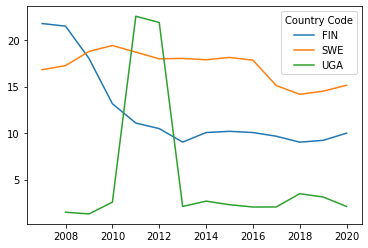

In [97]:
df.T[["FIN", "SWE", "UGA"]].plot()

Text(0, 0.5, '% of tech in exports globally')

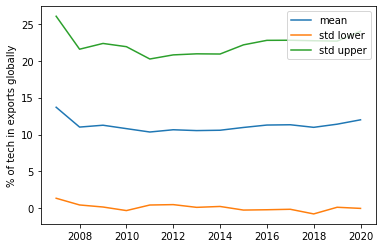

In [95]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1)
# mean
df.mean().T.plot(ax=axs, label="mean")
# std upper boundary
(df.mean() - df.std()).T.plot(ax=axs, label="std lower")
# std lower boundary
(df.mean() + df.std()).T.plot(ax=axs, label="std upper")
axs.legend()
axs.set_ylabel("% of tech in exports globally")

### Palvelurekisteri

In [99]:
df = pd.read_json(
    "https://www.hel.fi/palvelukarttaws/rest/vpalvelurekisteri/description/"
)
df.head()

,id,main_description,service_id,title,description_short
0,2773,True,10004,Perusopetus,9-vuotisessa peruskoulussa saa yleissivistävän...
1,3006,False,10004,Koulun kerhotoiminta,Helsinkiläisille peruskoululaisille järjestetä...
2,3384,False,10004,Joustava perusopetus (JOPO),Joustavassa perusopetuksessa (JOPO) opiskellaa...
3,3405,False,10004,Painotettu opetus,Peruskoulut voivat painottaa opetuksessaan tie...
4,3406,False,10004,Avustajapalvelut ja apuvälineet,Oppilaalla on oikeus saada maksutta opetukseen...


In [101]:
df.dtypes

id                    int64
main_description       bool
service_id            int64
title                object
description_short    object
dtype: object

In [102]:
df.nunique()

id                   755
main_description       2
service_id           314
title                753
description_short    743
dtype: int64

In [119]:
df["title"] = df["title"].astype("string")
df.description_short = df.description_short.astype("string")
df.dtypes

id                    int64
main_description       bool
service_id            int64
title                string
description_short    string
dtype: object

In [120]:
df.head()

,id,main_description,service_id,title,description_short
0,2773,True,10004,Perusopetus,9-vuotisessa peruskoulussa saa yleissivistävän...
1,3006,False,10004,Koulun kerhotoiminta,Helsinkiläisille peruskoululaisille järjestetä...
2,3384,False,10004,Joustava perusopetus (JOPO),Joustavassa perusopetuksessa (JOPO) opiskellaa...
3,3405,False,10004,Painotettu opetus,Peruskoulut voivat painottaa opetuksessaan tie...
4,3406,False,10004,Avustajapalvelut ja apuvälineet,Oppilaalla on oikeus saada maksutta opetukseen...


## Clean the data and make it tidy

In [60]:
# your code here

## Visualize the data

In [61]:
# your code here

## Intermediate conclusions based on data visualization

what do you see?

## Suffle dataset 

(skip if time series)

In [62]:
# your code here

## Save clean and tidy data for further use

In [63]:
# your code here

## Sample a small toy dataset (N = 10-1000) for developing and software testing the ML algorithm

In [64]:
# your code here

save the toy dataset:

In [65]:
# your code here

## You can now move on to the model notebook!